In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

def graph(lambda_arr, xmin, xmax):
    xplot = range(xmin, xmax+1)
    ymin = 0
    ymax = 0
    for f in lambda_arr:
        yplot = []
        for x in xplot:
            y = f(x)
            if y < ymin:
                ymin = y
            if y > ymax:
                ymax = y
            yplot.append(f(x))
        plt.plot(xplot, yplot)
    plt.axis([xmin, xmax, ymin, ymax])

# linear algebra

`What do I need to start?`
Look at 3blue1brown's videos.

`What is a linear equation?`

An equation that looks like 

$ax_1+bx_2+cx_3+...=z$

Each $x_i$ is a variable, and everything else is a constant that you know the value of.

In 1d, a linear equation could be be $ax_1=z$, which is a single point.

In 2d, a linear equation could be $ax_1+bx_2=z$, which is a line.

In 3d, a linear equation could be $ax_1+bx_2+cx_3=z$, which is a plane.

In 2d, a or b could be 0, so it would be like a 1d line in 2d space, or a 0d point in a 2d space.

In 3d, a, b, or c could be 0, so you could have a 2d plane, a 1d line, or a 0d point in 3d space.

A point cuts 1d space in half.  A line cuts 2d space in half.  A plane cuts 3d space in half.  And so on.

`What is a system of linear equations?`

A bunch of linear equations.  The canonical question of a system of linear equations is 'what $x_i$ values make all of these equations true simultaneously?'

If you have 2 lines in 2d space, like so:

$$
x + y = 2 \\
2x + y = 1
$$

This is a system of linear equations.  On their own, these equations both have infinite solutions.  But we want the solutions that satisfy both equations at the same time.  In this case, the two lines cross at the single point $x=-1, y=3$.  So there is only 1 solution here.  

Visually, this is 2 lines.

If the lines are parallel, there are 0 solutions.

If the lines cross, there is 1 solution.

If the lines are actually the same line, there are infinite solutions.

`How come there's never 2 solutions to these problems?`

Because lines can only cross once.  If you had a parabola and a line, for instance, they could cross as 0 points, 1 point, or 2 points, which would mean 0, 1, and 2 solutions.

But this is linear algebra, so there are only lines.


`Is this all linear algebra is for?  Solving systems of equations?`

Pretty much, yes.  The solution to a system of equations is a vector, which is a list of numbers.

All the algebra, calculus, etc we've done before has been to get answers that were single numbers.  Now we're getting lists of numbers.  So linear algebra is just a flexible and expressive as all the other math we've learned.  Saying that it's 'for solving systems of equations' makes it seem like linear algebra is a technique for a specific kind of problem, when really it's a more compact way of expressing all the math we've done before.

`Why does this get its own name?  It seems really simple.`

What if you had 100 lines that all lived in 100d space?  It would get really difficult to compute, and to write out.

`Is there an easier way to solve these systems of equations?`

Yes.  Lets do an example. Here's an example linear system:

$$
x_1 + 2x_2 = 3 \\
2x_1 - x_2 = 1
$$

First, we take the equations and put them into an 'augmented matrix', like this:

$$
  \left[\begin{array}{rr|r}
    1 & 2 & 3 \\
    2 & -1 & 1
  \end{array}\right]
$$

So the first column corresponds to $x_1$, the second column corresponds to $x_2$, and the third column corresponds to the constant terms.  We want a 0 in the bottom left corner so we can find the corresponding value of the $x_2$ term.  This is why we want 'lower triangular form'.  In LTF, the bottom equation has the least amount of variables, the second to last equation has 1 more variable, etc.  Hopefully the bottom equation only has 1 variable.  If so, we only have 1 solution.  If there are 2 or more variables after row reducing, there are infinite solutions.  If it's all 0's at the bottom, there are no solutions.

For this specific matrix, after row reduction we have this:

$$
  \left[\begin{array}{rr|r}
    1 & 0 & 1 \\
    0 & 1 & 1
  \end{array}\right]
$$

`What is happening when we add/subtract a whole equation from another?  What kind of mathematical operation is this?`

Look at this example system of equations:

$$
f(x) = -x_1 + 1 \\
g(x) = \frac{-1}{2}x_1 + \frac{3}{2}
$$

Here is the graph of these two equations:


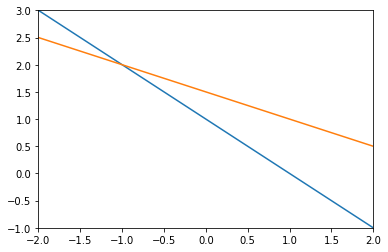

In [44]:
f = lambda x: -1*x + 1
g = lambda x: (-1*x + 3)/2
graph([f, g], -2, 2)

We want to find where these two functions f and g intersect.  The graph shows us that they intersect at (-1, 2), but graphing functions takes a long time.  We want to find the intersection mathematically, without needing to graph the functions.

f and g will cross each other when they have the same value.  In other words, when $f(x)-g(x)=0$.

To figure out when f and g have the same value, we make a new function called h that looks like this:  

$h(x)=f(x)-g(x)$

For every possible value of x, our function h will output the difference between f and g.  

So if $h(x)=0$, that means that f and g have the same value, which means they have crossed.  

Here's h graphed alongside f and g:

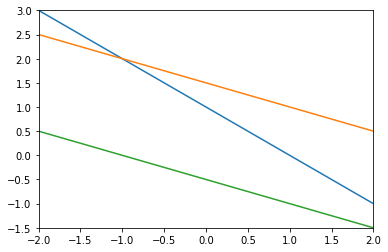

In [45]:
h = lambda x: f(x) - g(x)
graph([f, g, h], -2, 2)

It's kind of difficult to see, but $h(x)=0$ when $x=-1$, which means the x coordinate where f and g cross is -1.  Once we have the x coordinate, we can plug that x value into f or g to get the y value we need.  Here's how you would find $x=-1$ mathematically:

$$
h(x) = f(x) - g(x) \\
h(x) = -x + 1 - \frac{-1}{2}x - \frac{3}{2} \\
h(x) = \frac{-1}{2}x + \frac{-1}{2} \\
\text{Now set h equal to 0} \\
h(x) = 0 \\
\frac{-1}{2}x + \frac{-1}{2} = 0 \\
x = -1 \\
$$

We have now found the x coordinate that will tell us where our functions have crossed.  Now we can plug x into either f or g to get the y coordinate:

$$
f(1) = -(-1) + 1 = 2 \\
g(1) = \frac{-1}{2}*-1 + \frac{3}{2} = 2
$$

So when $x=-1$, both $f(x)=2$ and $g(x)=2$, meaning they have crossed, and we have found the point we were looking for, (-1, 2).

`How is this mathematically equivalent to row reduction?`

`So each row is a linear equation.  What is the thing on the right of the equals sign called?  How does it affect the line?  How is it different from the numbers attached to the x's?`

Look at this equation:

$3x + y = 2$

This is just another form of the equation

$y = -3x + 2$

Without the '+2', this line would go through the origin with a '-3' slope.  With the '+2', it goes through the y-intercept at '+2', and the x-intercept at '-2'.

In the latter equation, the '+2' is called the y-intercept.  It shifts the lines away from the origin.  In this case, it shifts the line up 2 spaces on the y axis.

I'm just going to call it the constant term.  Constant for short.  The other things aren't constants, they're coefficients.

`Why does adding 2 shift the y-axis?  Why is the x-axis reversed?`

Because we're adding it to the x side of the equation.  These two equations are equivalent:

$$
y = -3x + 2
y - 2 = -3x
$$

Shifting the line up 2 is the same as shifting the line left 2.  

Now look at these 2 equations:

$$
y = -3x - 2
y + 2 = -3x
$$

These two equations are also equivalent.  Shifting the line 2 down is the same as shifting the line 2 right.

`If each row in a matrix is a linear equation, why does 3blue1brown talk about the columns all the time?`

`What exactly is a vector?  Is it a point?  Is it an arrow?  A list of numbers?`

`So an augmented matrix represents the coefficients of a bunch of variables, and the thing on the right of the bar is what they equal.  What does a non-augmented matrix represent?  It's just a bunch of variable coefficients without saying what they're all equal to.`

`Why is matrix multiplication defined like it is?`

`What is the difference between an Nx1 matrix a N-length column vector?`

`What does multiplying a row vector by a matrix on the left mean?  We want to solve linear equations, and those equations are the rows of the matrix.  But you're multiplying by columns, so you multipy by a bunch of x_1's, then a bunch of x_2's, etc.  It doesn't make sense.`

`Would you ever actually want to multiply a row vector by a matrix to its right?  Or is it just a consequence of how we've defined matrix multiplication?`

`Why upper triangular form specifically?  Is there anything better?`
Yes.  The more 0's the better, because that means it's an equation with fewer variables.  If you can get it to be diagonal, you have a solution for each of your variables.

`vectors` are lists of numbers.  Here's an example:  

[1, 3, 5, 3.423].  

In regular algebra, you used `scalar` numbers to describe things.  4 apples.  1 person.  3 slices of pie.  In linear algebra, you use vectors to describe things.  Each number in the list describes some characteristic of the thing you're describing.  We could say an apple is described by a vector where the first number describes the apples weight, the second describes its volume, the third describes its caloric content, and the fourth describes its acid content.

In physics, vectors are often thought of as arrows in space, usually 2d or 3d space.  Each number in these vectors describes one of the d's (dimensions) in those spaces.  Really, it's the same either way.  You could interpret a physics vector as just a list of numbers, and you could interpret an apple vector as an arrow in 4-dimensional apple space.

A scalar is really just a 1d vector.  4 apples in 1d apple space.  1 person in 1d person space.  3 slices of pie in 1d pie space.

`linear combinations` are combinations of vectors.  Vectors can be stretched, squished, and added together.  

You can stretch / squish a vector by multiplying it by a scalar.  

You can add vectors together by adding their individual components together.

The `span` of a set of vectors is all the new vectors you can make through linear combinations of the vectors in your set.

`i hat, j hat, k hat` are simple vectors that are commonly used to make linear combinations.  i hat is for the x dimension, j hat for y, and k hat for z.  i hat and j hat are commonly used as the basis vectors of $R^2$, meaning that they span $R^2$.  i, j, and k are commonly used as the basis vectors of $R^3$.

$$
\hat{i} = [1, 0, 0] \\
\hat{j} = [0, 1, 0] \\
\hat{k} = [0, 0, 1] \\
$$

Think of a robot that can only move by deciding to move either $\hat{i},\hat{j},$ or $\hat{k}$, or some fraction of anyof them.  It could go anywhere in 3-dimensionsal space.  If you think of a set of vectors as the decisions of a robot, then all the places the robot can go is the span of that set of vectors.

`basis vectors` It turns out that $\hat{i},\hat{j},$ and $\hat{k}$ are special vectors, because they are `linearly independent`.  They have nothing in common in terms of where they can point.  They are all `orthogonal` to eachother.  Consider the vector $\hat{g}$ = [0, 1, 1].  $\hat{g}$ is independent from $\hat{i}$, but not independent from $\hat{j}$ or $\hat{k}$.  The three vectors $\hat{i}$,$\hat{j}$,$\hat{g}$ are a spanning set of $R^3$, but they are not a set of basis vectors for $R^3$, because they are not all linearly independent from eachother.  Basis vectors are easier to make linear combinations with.

Any vector in $R^2$ can be made with $\hat{i}$ and $\hat{j}$.  For instance, v=[-1, 2] is the same thing as $v=-1*\hat{i}+2*\hat{j}$.

Imagine if your robot wanted to move 1 space in the z direction.  The only way to do that would be to select $\hat{g}$.  But then it would also have to move -1*$\hat{j}$.  This robot is basically z-disabled.  Look at what you've done.  You've crippled your robot.

<details><summary>But this robot is more efficient when it's moving in $\hat{g}$-like directions.  How is this bad?</summary>
We want to be equally efficient in moving in any direction, because we're equally likely to move in any direction.  Linearly independent basis vectors are equally efficient no matter which direction you're going.
</details>

`linear transformations` A transformation on a vector just means to change that vector into another vector.  A linear transformation is a transformation that only rotates/stretches/squishes the vector.  No curving.

In linear algebra, all vectors are some combination of basis vectors.  In $R^2$, it's $\hat{i},\hat{j}$.  In $R^3$, it's $\hat{i},\hat{j},\hat{k}$.

To linearly transform a vector, just transform it's $\hat{i}$ and $\hat{j}$ components, then combine them.

Say we have a vector $\vec{p}=x*\hat{i}+y*\hat{j}$.  A linear transformation changes $\hat{i}$ and $\hat{j}$.  Now the new $\vec{p}=x*(transformed\ \ \hat{i})+y*(transformed\ \ \hat{j})$.  

`matrix` A matrix is a function that does linear transformations on vectors.  They look like this:

$$
\begin{bmatrix}
i_1 & j_1 \\
i_2 & j_2 
\end{bmatrix}
$$

The first column represents the transformed $\hat{i}$, and the second represents the transformed $\hat{j}$.  

This matrix says "turn $\hat{i}=[1, 0]$ into $\hat{i}=[1, 2]$ and turns $\hat{j}=[0, 1]$ into $\hat{j}=[3, 4]$":

$$
\begin{bmatrix}
1 & 3 \\
2 & 4 
\end{bmatrix}
$$

What if you wanted to make a matrix for $R^2$ that rotates all vectors 90 degrees left?  Just rotate $\hat{i}$ and $\hat{j}$ by 90 degrees each.  Now you have a matrix that describes how to rotate any vector in $R^2$ 90 degrees left.

$$
\begin{bmatrix}
0 & -1 \\
1 & 0 
\end{bmatrix}
$$

Since all vectors in $R^2$ are just some combo of $\hat{i}$ and $\hat{j}$, by rotating these 2 vectors, you've essentially rotated all the other vectors too.  Note that you could do this equally well for some other set of basis vectors.

Could you do the same thing with some other set of basis vectors?  What about a spanning set that isn't a basis set?  What does it mean to have a matrix of vectors that doesn't consist of basis vectors?  What about basis vectors that aren't $\hat{i}$ and $\hat{j}$?  Wouldn't that be a transformation that actually does stuff?

<details><summary>Why is matrix multiplication rows to columns?</summary>
If we look at how A*x should be formatted, the first thing we think is that x should be vertical, not horizontal.
    
$$
\begin{bmatrix}
1 & 3 \\
2 & 4 
\end{bmatrix}
*
\begin{bmatrix}
5 \\
6 
\end{bmatrix}
$$

This seems fine.  But what if x was horizontal?

$$
\begin{bmatrix}
1 & 3 \\
2 & 4 
\end{bmatrix}
*
\begin{bmatrix}
5 & 6
\end{bmatrix}
$$

This version of matrix multiplication wastes whitespace.  Specifically the extra space above and below x.  So the quintessential vector is vertical, not horizontal.  So each item in the vector x will either be multiplied by an entire row in the matrix, or an entire column in the matrix.

While it seems to me that multiplying each item in the vector by a row is more intuitive, there is something to be said about multiplying by columns.  If our x vector is a column, it is more thematically consistent to have $\hat{i}$ and $\hat{j}$ be columns in A, so that they are similar to x.

The takeaway from this is that we could have defined it some other way.  There is no deep meaning to how we have defined matrix multiplication other than 'it looks pretty'.

</details>

`determinants` are how much a matrix 'expands' or 'contracts' the space that it transforms.  It doesn't really make sense to think about on a single vector.  Let's look at the below matrix:

$$
\begin{bmatrix}
3 & 0 \\
0 & 2 
\end{bmatrix}
$$

Here, $\hat{i}$ gets stretched by a factor of 3, and $\hat{j}$ gets stretched by a factor of 2.  If you think of $\hat{i}$ and $\hat{j}$ as making a little 1x1 box before, now they make a 2x3 (j comes before i) box, so the determinant is 6.  Again, the determinant is how much the matrix changes space.  It is the ratio of the new area to the old area of the box made by i and j.  Since the ratio of the old area is always 1, the stretching is always (new area)/(old area) = (new area) / 1 = (new area).  So the determinant is the area of the new box.

But it's more complicated than that.  With the matrix: 

$$
\begin{bmatrix}
3 & 0 \\
0 & 0 
\end{bmatrix}
$$

Our 2d space is now a 1d space.  Any time you get rid of dimensions, the determinant is 0.

The determinant can also be negative.  

$$
\begin{bmatrix}
-1 & 0 \\
0 & 1 
\end{bmatrix}
$$

An area can't be negative, and that's kind of where our 'area' analogy breaks down.  Think of a negative determinant as our square flipping over onto its backside, since j is now 'on the right' of i instead of 'on the left'.

Imagine you had a 2d picture of mario's face, completely symmetric except for a single mole on his right cheek.  If the determinant is negative, mario's face flips, and the mole is now on his left cheek.

Only square matrices have determinants.  What would it mean to 'expand' a 2 dimensional square into 3 dimensions via a 3x2 matrix?  What is its area now?  That doesn't even make sense, because now the square is no longer a square, it's some 3d shape.  It has volume now, not area.

Speaking of volume, the determinant for volume can also be negative using the same 'mario mole' example.  But it is slightly more complicated.  If any 2 of i, j, and k switch places, the determinant will be negative.  If we get 3 shifts in some way, the mole will still be on mario's right cheek and the determinant will be positive.  There's some generalization of this, but I don't care enough to think about it.

Determinant formula:

$$
det(\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}) = ad-bc
$$

Consider the case where b and c are 0.  In this case, i and j are just scaled along their respective axes.  If you add a positive b and c, both i and j are now pointing up and to the right.  The closer i and j get, the more the determinant rhombus thing gets squeezed, and the less area it has.  So b and c combine to form a kind of 'negative rhombus' that subtracts from the total rhombus of the determinant.  Of course, if b\*c turns out to be negative, the determinant will increase in value.

The determinant tells us how much the vectors distances relative to eachother change.  If the determinant of a matrix is 6, all vectors that were originally 1 away from each other will now be 6 apart.  All vectors that were 2.5 away from eachother will not be 15 apart.

For now, skip trying to reason out why this formula works exactly.  Also skip for 3d and onward.  Maybe come back to it.  But you can also decompose into triangular matrices for high dimension matrices.  Maybe that formula will be easier to explain.

`rank` the number of dimensions in the matrix output.  A 3x2 matrix takes in 2-vectors and outputs 3-vectors, so the rank of that matrix is 3.  Unless it outputs a plane of vectors in 3-space, in which case it's rank is 2.  Or if it turns every vector into [0 0 0], in which case it's rank is 0.

`column space` is the span of all the vectors that your matrix can output.  So it's the span of the columns, since your matrix outputs linear combinations of its columns.

`null space` all the vectors your matrix turns into 0.  If it's any more than a single vector your matrix is squishing space.

Also need inverse matrices, row space, whatever.

`dot product` is a special kind of linear matrix transformation.  It's used to discover the relationship between 2 vectors v and w.  If the dot product is 0, they're perpendicular, if they're facing the same direction, it's positive.  If they're facing different directions, it's negative.  In general, the dot product is used to measure 'similarity' between 2 vectors.

Remember all the vectors from 3blue1brown being folded onto a plane?  It's like that.  Notice that the arrow pointing perpendicular to the plane gets 'folded' by being squished down into nothing.  So here you're squishing a vector into another vector.  If that squished vector is 0, you know the 2 vectors are perpendicular.

You take 2 vectors, say v and w, of the same dimension and matrix multiply them into a single number.  In this instance, either v or w could be considered the matrix, and the other the vector.  Really what this shows is that vectors are just matrices.  A vector is really a nx1 matrix, where the n is each individual actual dimension of whatever, and the 1 output is a single measure whatever it is.  It's kind of weird to think about for a lot of things.  I guess if you took the dot product between 2 apple vectors and they were perpendicular, they would be like, opposite apples or something?  But with an apple you can't have any negative attributes.  So that doesn't really make sense.

It is kind of weird that the dot product is so 'asymmetric'.  That's covered in the video.  Maybe explain that later.

`cross product` take 2 vectors v and w, and you can use the cross product to find a third vector p that is perpendicular to both v and w at the same time.  Also p's length will be equal to the rhombus created by v and w (as though v and w were i and j).  It's pretty simple to find a vector orthogonal to v, and simple to find a vector orthogonal to w, but in 3d there are infinite vectors orthogonal to v and w.  So how do you find a vector orthogonal to both v and w out of infinitely many vectors?  With the cross product.

`eigenvectors` look at the 'change of basis' video maybe.  All nxn (square) matrices have eigenvectors.  A vector is an eigenvector for a matrix if that matrix stretches/squishes the vector but doesn't rotate it.

`Eigenvalues` each eigenvector is stretched/squised by a certain amount; its eigenvalue.

`diagnol matrix` are easy to work with.  Can easily compute things many times.  All 0's except the diagnol.  The basis vectors are all eigenvectors of a diagnol matrix.

`eigenbasis` how do I compute the 100th power of this matrix?  Easiest way is to do change of basis to some eigenbasis, do the 100th power, then change of basis back.  Not all matrices can be diagnolized (translated).  Things like a rotation, which don't have any eigenvectors.  But there are other ways to do those.  Maybe break it up into it's rotational part and its scaling part.  Then you can change of basis the scaling part, then do that modulo thing for the rotation.


# unused

This means that matrix vector multiplication will either be 'rows to rows' or 'rows to columns'.  As a side note, do NOT think of matrix vector multiplication as being 'rows to columns' or anything like that.  It is each individual part of the vector turning into a scalar and scalar vector multiplying a whole column of the matrix. 

Could potentially think of $\hat{i}$ as 'the single unit of mass' and $\hat{j}$ as 'the single unit of volume'.  Everything is just combinations of these single units that make up a whole that is an apple vector.

But what about the vectors $\hat{g}$ = [2, 1] and $\hat{h}$ = [1, -2]?  Those actually also have nothing in common.  While the individual vectors are a little weird, this robot is just as efficient as our ijk robot.  So how do you tell if 2 vectors 'have nothing in common'?  With the dot product.

Maybe include that thing about George Cantor about questions and answers.  Reformat all of this stuff.  Just go by questions.  How do I answer this question?  How do I answer this one?  The mario face question.  The 'translation' question.  Maybe some money questions.

What about rowspace and left nullspace?  As far as we care, vectors are always on the right of matrices.  But really that's not the case.  There's row space and left nullspace.  We could put vectors on the left.  In some cases, it's easy to do this.
